Author: Nik Alleyne <br>
Author Blog: **https://www.securitynik.com** <br>
Author GitHub: **github.com/securitynik** <br>

Author Books: [  <br>

                "https://www.amazon.ca/Learning-Practicing-Leveraging-Practical-Detection/dp/1731254458/", 
                
                "https://www.amazon.ca/Learning-Practicing-Mastering-Network-Forensics/dp/1775383024/" 
            ] 


### Why this series?
When teaching the SANS SEC595: Applied Data Science and Machine Learning for Cybersecurity Professionals 
**https://www.sans.org/cyber-security-courses/applied-data-science-machine-learning/** I am always asked,
"Will you be sharing your demo notebooks?" or "Can we get a copy of your demo notebooks?" or ... well you get the point.
My answer is always no. Not that I do not want to share, (sharing is caring :-D) , but the demo notebooks 
by themselves, would not make sense or add real value. Hence, this series! 

This is my supplemental work, similar to what I would do in the demos but with a lot more details and references.



## 11. Beginning Linear Regression

### The series includes the following: <br>
01 - Beginning Numpy <br>
02 - Beginning Tensorflow  <br>
03 - Beginning PyTorch <br>
04 - Beginning Pandas <br>
05 - Beginning Matplotlib <br>
06 - Beginning Data Scaling <br>
07 - Beginning Principal Component Analysis (PCA) <br>
08 - Beginning Machine Learning Anomaly Detection - Isolation Forest and Local Outlier Factor <br>
09 - Beginning Unsupervised Machine Learning - Clustering - K-means and DBSCAN <br>
10 - Beginning Supervise Learning - Machine Learning - Logistic Regression, Decision Trees and Metrics <br>
11 - Beginning Linear Regression - Machine Learning <br>
12 - Beginning Deep Learning - Anomaly Detection with AutoEncoders, Tensorflow <br>
13 - Beginning Deep Learning - Anomaly Detection with AutoEncoders, PyTroch <br>
14 - Beginning Deep Learning - Linear Regression, Tensorflow <br>
15 - Beginning Deep Learning - Linear Regression, PyTorch <br>
16 - Beginning Deep Learning - Classification, Tensorflow <br>
17 - Beginning Deep Learning - Classification, Pytorch <br>
18 - Beginning Deep Learning - Classification - regression - MIMO - Functional API Tensorflow <br> 
19 - Beginning Deep Learning - Convolution Networks - Tensorflow <br>
20 - Beginning Deep Learning - Convolution Networks - PyTorch <br>
21 - Beginning Regularization - Early Stopping, Dropout, L2 (Ridge), L1 (Lasso) <br>
22 - Beginning Model TFServing <br>

But conn.log is not the only log file within Zeek. Let's build some models for DNS and HTTP logs. <br>
I choose unsupervised, because there are no labels coming with these data. <br>

23 - Continuing Anomaly Learning - Zeek DNS Log - Machine Learning <br>
24 - Continuing Unsupervised Learning - Zeek HTTP Log - Machine Learning <br>

This was a specific ask by someone in one of my class. <br>
25 - Beginning - Reading Executables and Building a Neural Network to make predictions on suspicious vs suspicious  <br><br>

With 25 notebooks in this series, it is quite possible there are things I could have or should have done differently.  <br>
If you find any thing, you think fits those criteria, drop me a line. <br>

If you find this series beneficial, I would greatly appreciate your feedback.


In [1]:
# Let's import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data
# This is the data we previously saved from the Pandas notebook:
#   11 - Beginning Linear Regression - Machine Learning
df_conn = pd.read_csv(r'df_conn_cleaned.csv', index_col=0)
df_conn

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
0,127.0.0.1,27762,127.0.0.1,58552,0.000000,0,0,0,0,0,0
1,192.168.0.4,27761,192.168.0.4,48798,0.000000,0,0,0,0,0,0
2,192.168.0.4,27761,192.168.0.4,48804,0.000000,0,0,0,0,0,0
3,127.0.0.1,27762,127.0.0.1,58568,0.000000,0,0,0,0,0,0
4,192.168.0.4,48786,192.168.0.4,27761,0.000000,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4430183,192.168.0.21,55757,192.168.0.4,9200,0.000051,0,0,1,52,1,40
4430184,192.168.0.4,37236,192.168.0.4,9200,0.000023,0,0,0,0,1,40
4430185,192.168.0.4,37244,192.168.0.4,9200,0.000005,0,0,0,0,1,40
4430186,192.168.0.4,37246,192.168.0.4,9200,0.000005,0,0,0,0,1,40


This file represents Zeek (formerly Bro) connection log - conn.log`. <br>
Zeek is a framework used for Network Security Monitoring.  <br>
This entire series is based on using Zeek's data.  <br>
The majority of the notebooks use the conn.log <br>
You can learn more about Zeek here:
   
    https://zeek.org/

Alternatively, come hang out with us in the:
SANS SEC595: Applied Data Science and Machine Learning for Cybersecurity Professionals

        https://www.sans.org/cyber-security-courses/applied-data-science-machine-learning/ OR

SEC503 SEC503: Network Monitoring and Threat Detection In-Depth

        https://www.sans.org/cyber-security-courses/network-monitoring-threat-detection/


Here are also some blog posts on using Zeek for security monitoring
Installing Zeek: 

        https://www.securitynik.com/2020/06/installing-zeek-314-on-ubuntu-2004.html

Detecting PowerShell Empire Usage: 

        https://www.securitynik.com/2022/02/powershell-empire-detection-with-zeek.html

Detecting Log4J Vulnerability Exploitation: 

        https://www.securitynik.com/2021/12/continuing-log4shell-zeek-detection.html


In [3]:
# Verify the correlation matrix
# We learned about the correlation matrix in the Pandas notebook
#   04 - Beginning Pandas
# To confirm a positive correlation between the originator packets and the responder packets
# What this tells us, is we can use one to predict the other
# Let's use this concept to predict the responder packets based on the originator packets
df_conn['orig_pkts'].corr(df_conn['resp_pkts'])

0.84013158071697

<function matplotlib.pyplot.show(close=None, block=None)>

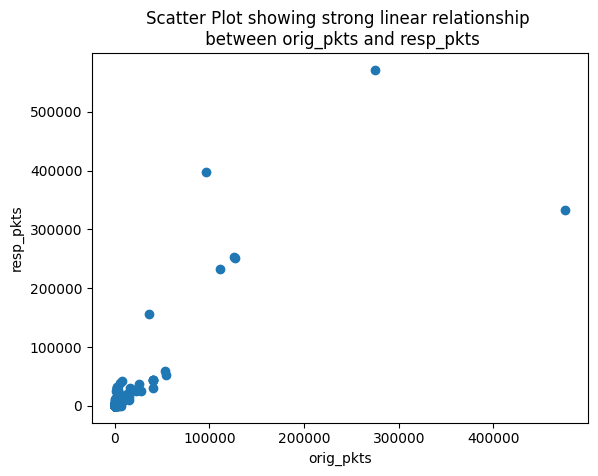

In [4]:
# Confirming the positive correlation
# We can see from below, generally, as x increases, y increases
# and as y increases, x increases. 
# Hence our strong positive correlation.
# What we need is a line that best fits this data
# Meaning, we need a m and b for y = mx + b
# The question is which line works best?
plt.title('Scatter Plot showing strong linear relationship \n between orig_pkts and resp_pkts')
plt.scatter(df_conn['orig_pkts'], df_conn['resp_pkts'])
plt.xlabel('orig_pkts')
plt.ylabel('resp_pkts')
plt.show

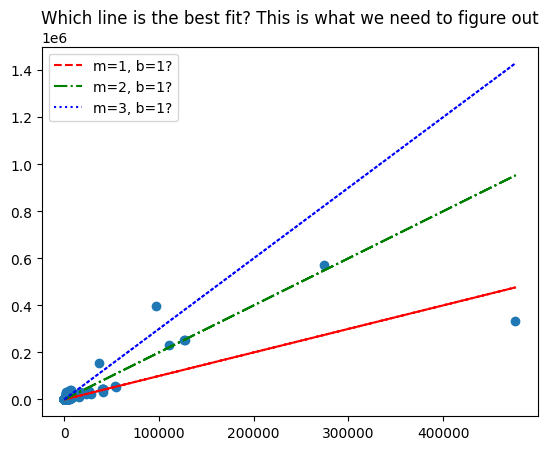

In [5]:
# Trying to figure out which line best fits our data
# As in which one will produce the smallest error
# I have chosen random the values 1, 2 and 3 for m. These were arbitrarily chosen. No special reason
# The +1 on all the lines represent the bias
plt.title('Which line is the best fit? This is what we need to figure out')
plt.scatter(df_conn['orig_pkts'], df_conn['resp_pkts'])
plt.plot(df_conn.orig_pkts, (1 * df_conn.orig_pkts) + 1, label='m=1, b=1?', c='r', linestyle='--' )
plt.plot(df_conn.orig_pkts, (2 * df_conn.orig_pkts) + 1, label='m=2, b=1?', c='g', linestyle='dashdot' )
plt.plot(df_conn.orig_pkts, (3 * df_conn.orig_pkts) + 1, label='m=3, b=1?', c='b', linestyle='dotted' )
plt.legend(loc='best')


In [6]:
# Let's build our own Linear Regression model, before moving on to sklearn
# Setup our x and y
x = df_conn['orig_pkts'].values.astype(np.float32)
y = df_conn['resp_pkts'].values.astype(np.float32)

# Get a view of teh data
x[:5], y[:5]

(array([0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32))

In [7]:
# Take the first 1000 records for training the linear regression model
x_1000_ols = x[:1000]
y_1000_ols = y[:1000]

Linear Regression with Ordinary Least Squares (OLS) <br>
OLS minimizes the sum of squares of residuals <br>

Using the Ordinary Least Square (OLS) <br>
first finding for m: <br>
m = sum((xi - x.mean) * (yi - y.mean)) / sum(xi - x.mean)**2 <br>
b = y.mean - m * x.mean <br>

R**2 is then used to learn how well he model is doing. <br>
R**2 best score is 1.0 <br>
R**2 of 0 means the model is doing no better than guessing <br>
R**2 less than 0 means the model is doing terrible <br>
R**2 = 1 - (sum(yi - y^)**2 / sum(yi - y.mean)**2) <br>


Reference: <br>
https://medium.com/geekculture/linear-regression-from-scratch-in-python-without-scikit-learn-a06efe5dedb6 <br>
https://betterdatascience.com/mml-simple-linear-regression/ <br>
https://developer.ibm.com/articles/linear-regression-from-scratch/ <br>
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html <br>
https://stackoverflow.com/questions/23309073/how-is-the-r2-value-in-scikit-learn-calculated <br>
https://en.wikipedia.org/wiki/Coefficient_of_determination <br>
https://datascience.oneoffcoder.com/psuedo-r-squared-logistic-regression.html <br>
https://www.youtube.com/watch?v=E5RjzSK0fvY <br>

In [8]:
# Defining linear regression based on Ordinary Least Squares
class OLS_SimpleRegression:
    ''' Compute OLS Linear Regression '''

    def __init__(self):
        ''' Defines the constructor '''
        print('Initializing ...')
        self.coef_ = 0.
        self.intercept_ = 0.

    def fit(self, X: np.array, y: np.array) -> np.ndarray:
        ''' 
        Training is done here 
        
        Args:
            x: Numpy array consisting of training features
            y: Numpy array consisting of labels
        
        Returns:
            coef_: The models weights
            intercept:  The intercept / bias
        
        '''
        numerator = 0
        denominator = 0
        self.n_samples = X.shape[0]
        self.X = X
        self.y = y
        print(f'Training on {self.n_samples} samples ...')

        for i in range(self.n_samples):
            numerator += (self.X[i] - np.mean(self.X)) * (self.y[i] - np.mean(self.y))
            denominator += (self.X[i] - np.mean(self.X)) ** 2
            self.coef_ = numerator / denominator
            self.intercept_ = np.mean(self.y) - (self.coef_ * np.mean(self.X))

        return (self.coef_, self.intercept_)

    def predict(self, x):
        ''' 
        Makes a prediction  
        
        Args:
            x: Numpy array consisting of value to predict
        
        Returns:
            y_pred: Prediction of x
        '''
        print(f'Predicting ...')
        self.y_pred = None
        if (self.coef_ == 0. and self.intercept_ == 0.):
            return ('Please train the model via .fit(x, y) first')
        else:
            self.y_pred = (self.coef_ * x) + self.intercept_
            return self.y_pred

In [9]:
# Define a r_squared function. This will test the "goodness" of our model
# R2 is used with OLS in Linear Regression
# Their are different variants of R2, this is the Efron's R2
# R2 range is between 0 & 1 with the higher score being better. 
# The higher score means more variance is explained by the model
# The R2 statistic is used to measure the amount of variance explained by the regression model
# 
def my_rsquared(y_true=np.array, y_pred=np.array) -> np.ndarray:
    ''' 
    Calculates the Efron R squared 
    
    Args:
        y_true: The true labels
        y_pred: The predictions
    
    Return:
        r2: The r2 results
    
    '''
    ss_residual = np.sum((y_true - y_pred)**2, axis=0)
    ss_total = np.sum((y_true - np.mean(y, axis=0))**2)

    r2 = 1 - (ss_residual/ss_total)
    
    return r2

In [10]:
# Instantiate the model
ols_regression = OLS_SimpleRegression()

# Fit the model
ols_regression.fit(X=x_1000_ols, y=y_1000_ols)

# Get the coefficient and intercept
ols_regression.coef_, ols_regression.intercept_

Initializing ...
Training on 1000 samples ...


(0.482986733496011, 1.7529325637683453)

In [11]:
# Make a prediction, show the real y
# Model has high bias and low variance.
# When comparing the predicted y vs the real y, we can see a reasonable amount of variance
# This needs work
ols_regression.predict(x_1000_ols[6:10]), 'Real y ->', y[6:10]

Predicting ...


(array([99.31625 ,  4.650853, 86.7586  , 84.343666], dtype=float32),
 'Real y ->',
 array([117.,   6., 174.,  71.], dtype=float32))

In [12]:
# Leveraging the RSquared to show how close the data points are to the regression line
# Calling my R^2 function to compute the R^2 value
# This is not that bad at all
# https://realpython.com/linear-regression-in-python/#underfitting-and-overfitting
my_rsquared(y_1000_ols, ols_regression.predict(x_1000_ols))

Predicting ...


0.7461162209510803

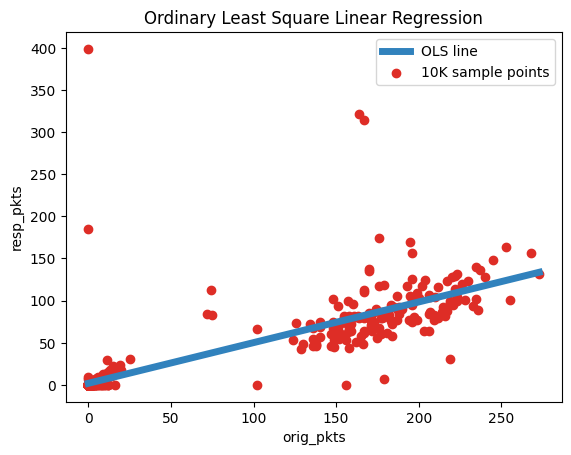

In [13]:
# Plot a line using the parameters returned from the function for m and b
# This give a visual to this data.
# Looking at this, one can immediately see, a linear regression may not be the solution to this problem
plt.title('Ordinary Least Square Linear Regression')
line_x = np.linspace(np.min(x_1000_ols), np.max(x_1000_ols), 1000)

# generate the y using the weights and bias returned from our model
line_y = ols_regression.coef_ * line_x + ols_regression.intercept_
plt.plot(line_x, line_y, label='OLS line', lw=5, ls='-', c='#3182bd')
plt.scatter(x_1000_ols, y_1000_ols, label='10K sample points', color='#de2d26')
plt.xlabel('orig_pkts')
plt.ylabel('resp_pkts')
plt.legend(loc='best')

In [14]:
# Import LinearRegression and r2_score from sklearn to validate my code works as expected
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [15]:
# Getting sklearn's results for 
lr = LinearRegression().fit(x_1000_ols.reshape(-1,1), y_1000_ols)

# Below shows the sklearn Linear Regression coefficient and intercept,
# matches what my custom class OLS_SimpleRegression produced
# The score differs a tiny bit 
lr.coef_, lr.intercept_, lr.score(x_1000_ols.reshape(-1,1), y_1000_ols)

(array([0.48298657], dtype=float32), 1.7529373, 0.7124332758134198)

In [16]:
# Results from my custom class and r2 score
ols_regression.coef_, ols_regression.intercept_, r2_score(y_1000_ols, ols_regression.predict(x_1000_ols))

Predicting ...


(0.482986733496011, 1.7529325637683453, 0.7124332760839533)

In [ ]:
# With the understanding of OLS, let's take a different view. This time with Gradient Descent

In [17]:
# Define the Mean Squared Error (MSE) loss function
# 
def MSELoss(y_true: np.array, y_pred: np.array) -> np.ndarray:
    ''' 
    Computes the Mean Squared Error (MSE) Loss 
    
    Args:
        y_true: Numpy array of true prediction
        y_pred: Numpy array consisting of predictions
    
    Returns:
        MSE loss of y_true and y_pred
    
    '''
    return np.mean((y_true.reshape(-1,1) - y_pred.reshape(-1,1))**2, axis=0)


In [18]:
# Testing the MSELoss function on the predicted data
MSELoss(y_true=y_1000_ols, y_pred=ols_regression.predict(x_1000_ols))

Predicting ...


array([403.37204], dtype=float32)

In [19]:
''' 
Linear Regression - using Gradient Descent 
https://www.youtube.com/watch?v=VmbA0pi2cRQ
https://pythonocean.com/blogs/linear-regression-using-gradient-descent-python
https://www.analyticsvidhya.com/blog/2021/04/gradient-descent-in-linear-regression/
https://machinelearningmastery.com/implement-linear-regression-stochastic-gradient-descent-scratch-python/
https://pythonocean.com/blogs/linear-regression-using-gradient-descent-python
https://www.kaggle.com/code/residentmario/gradient-descent-with-linear-regression

'''
class gradient_LinearRegression:
    ''' Linear Regression Gradient Descent '''
    def __init__(self):
        self.weights = None
        self.bias = None
    
    def fit(self, x, y, epochs=2, learning_rate=0.001):
        ''' Training is done here '''
        self.epochs = epochs        
        self.learning_rate = learning_rate

        n_samples, n_features = x.shape
        #print(f'Processing {n_samples} samples with {n_features} feature(s)')

        # Define a list to store the losses
        self.losses_ = []

        # Initializing the model parameters (weights and bias)
        self.weights = np.random.randn(n_features)
        self.bias = 0.
        #print(f'Model Parameters: Initial Weight(s) {self.weights} and bias {self.bias}')
        #print(f'x: {x}, y:{y}')
        for epoch in range(0, self.epochs, 1):
            cost = 0
            for i in range(n_samples):
                # Make the prediction
                y_pred = np.dot(x[i], self.weights) + self.bias

                # Calculates the loss on each sample
                cost = MSELoss(y[i], y_pred)  #  ((y_pred - y[i])**2) / (2*n_samples)

                # Calculating the partial derivatives of the loss with respect to the weight and bias
                dl_dw = (-2 / x.shape[0]) * np.sum(x[i] * (y[i] - y_pred))   #    2*(y_pred - y[i])
                dl_db = (-2 / x.shape[0]) * np.sum(y[i] - y_pred)
                
                # With partial derivatives in place, time to update the weights using Gradient Descent
                # This is one way to do it
                self.weights = self.weights - self.learning_rate * dl_dw
                self.bias =  - self.bias - self.learning_rate * dl_db

                # Or we can do it this way. This uses a temp variable
                # test_w = self.weights - learning_rate *  cost * x[i]
                # test_b = self.bias - learning_rate * cost
                # self.weights = test_w
                # self.bias = test_b

                # Or maybe even add a scaling term ( 2/n_samples )
                #test_w = self.weights - learning_rate * (( 1/n_samples) * cost) * x[i]
                #test_b = self.bias - learning_rate * (( 1/n_samples) * cost) * cost

                cost += cost

            # Get the average cost across all samples
            cost /=  x.shape[0]
            self.losses_.append(cost)
            if epoch %10 == 0:
                print(f'Epoch:{epoch} -> Prediction: {y_pred} -> y_true: {y[i]} -> Cost: {cost}')
        return (self.weights, self.bias, cost, self.losses_)

    def predict(self, x):
        ''' Make predictions based on the learned parameters '''
        if ( self.weights == None ) and (self.bias == None):
            print('[ERROR] Oops! Need to train before predicting ')
            return
        return np.dot(x, self.weights) + self.bias

In [20]:
# Initialize our weight as the same value each time
np.random.seed(10)

# Instantiate the Gradient Descent Linear Regression class
lr_gradient = gradient_LinearRegression()

# Try to call prediction before training
lr_gradient.predict(x_1000_ols[0])

[ERROR] Oops! Need to train before predicting 


In [21]:
# Fit the model and run for 5 epochs
history = lr_gradient.fit(x_1000_ols.reshape(-1, 1), y_1000_ols, epochs=15, learning_rate=.01)
history

Epoch:0 -> Prediction: 0.5698498333920414 -> y_true: 1.0 -> Cost: [0.00037006]
Epoch:10 -> Prediction: 0.8520884445909848 -> y_true: 1.0 -> Cost: [4.37556564e-05]


(array([0.54745065]),
 -0.4344261296596334,
 array([6.56902463e-07]),
 [array([0.00037006]),
  array([0.0003271]),
  array([0.000286]),
  array([0.0002469]),
  array([0.00020998]),
  array([0.00017538]),
  array([0.00014329]),
  array([0.00011388]),
  array([8.73550611e-05]),
  array([6.39094874e-05]),
  array([4.37556564e-05]),
  array([2.71152393e-05]),
  array([1.42207559e-05]),
  array([5.31607667e-06]),
  array([6.56902463e-07])])

In [22]:
# Make a prediction on the 6th record from 
lr_gradient.predict(x_1000_ols.reshape(-1, 1)[6])

110.1506045237027

In [23]:
# Get the coefficients
lr_gradient.weights, lr_gradient.bias

(array([0.54745065]), -0.4344261296596334)

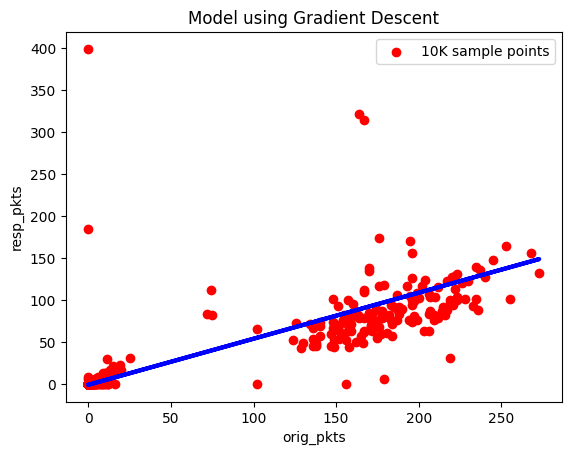

In [24]:
# Plot the graph using the gradient decent model
plt.title('Model using Gradient Descent')
plt.scatter(x_1000_ols, y_1000_ols, label='10K sample points', color='red')
plt.plot(x_1000_ols, x_1000_ols * lr_gradient.weights + lr_gradient.bias, lw=3, c='blue', linestyle='-')
plt.xlabel('orig_pkts')
plt.ylabel('resp_pkts')
plt.legend(loc='best')


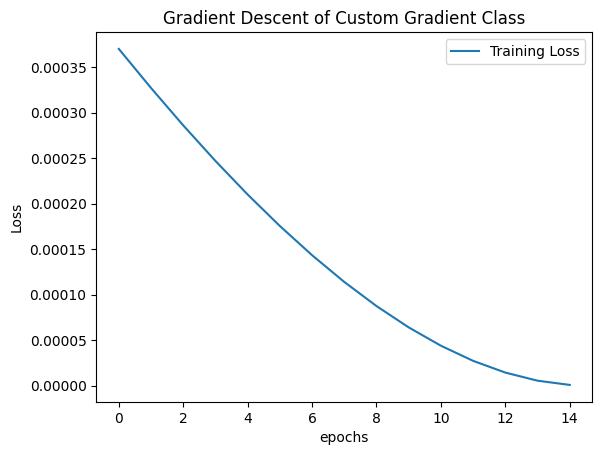

In [25]:
# plot the loss
plt.title('Gradient Descent of Custom Gradient Class')
plt.plot(history[3], label='Training Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(loc='best')

In [26]:
# Let's take advantage of sklearn's Linear Regression
# We already did this before via a sneak view of the OLS linear model
from sklearn.linear_model import LinearRegression

In [27]:
# Because we have one feature and one target, we needed to reshape both the feature and the target
# (-1, 1) means, give me any number of rows, but only 1 column
# We learned about reshaping in the following notebooks:
#   01 - Beginning Numpy
#   02 - Beginning Tensorflow
#   03 - Beginning PyTorch

# Using the entire dataset this time around
lr = LinearRegression().fit(X=df_conn.orig_pkts.values.reshape(-1, 1), y=df_conn.resp_pkts.values.reshape(-1, 1))
lr

LinearRegression()

In [28]:
# With this in place, let's get the coefficients
lr.intercept_, lr.coef_

(array([0.16367298]), array([[1.25191242]]))

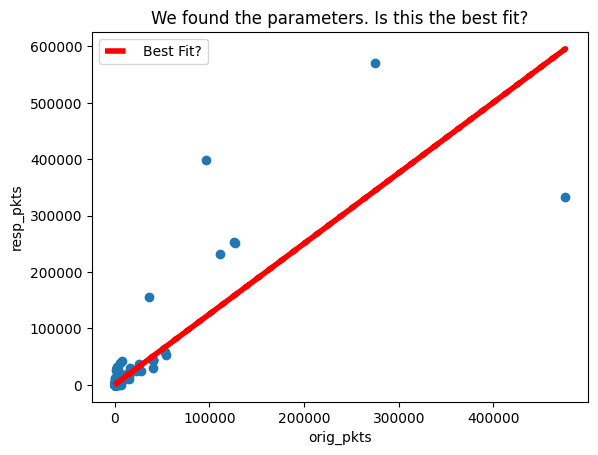

In [29]:
# Plotting again, using the coefficient and intercept from the linear regression model
plt.title('We found the parameters. Is this the best fit?')
plt.scatter(df_conn['orig_pkts'], df_conn['resp_pkts'])
plt.plot(df_conn.orig_pkts, (lr.coef_.flatten() * df_conn.orig_pkts) 
         + lr.intercept_, label='Best Fit?', c='r', linestyle='--', linewidth=4)
plt.xlabel('orig_pkts')
plt.ylabel('resp_pkts')
plt.legend(loc='best')
plt.show()


In [30]:
# Above, we have a line that seems to be the best fit. 
# As in this is the line which has the smallest error
# We have a line, we have a fit. This fit is not perfect.
# This model has high bias but low variance
# Meaning, we are going to predict and those predictions are not going to vary much
# With high bias, this model has not learned the data as well 
# For example, if we make a prediction for 100000, we get 
lr.predict([[100000]])

array([[125191.40584961]])

In [31]:
# From above, it looks like when x (originator packets) is 100,000 y (the responder packets) is about 25,000 more than x
# If we now plug x in as 200,000 originator packets, we should get about 250,000
lr.predict([[200000]])

array([[250382.64802624]])

In [32]:
# What you should recognize with this is that their is a little variance. 
# However, if we look at the graph above, we see that around 500,000K
# the value of y is much lower than the value of x at 300K. 
# So while we have consistent results as in low variance, 
# The model has a high bias as in it did not fully learn the structure of the data
# To prove our point, let's make a prediction at 500,000
# As you can see from the result, the model is not fully reflective of the real data
# Once again, high bias, but low variance
# Based on the image above, we would have expected 500K on the X axis to fall somewhere between 
# 300K and 400K on the y axis, considering the one point on the bottom right of the line
lr.predict([[500000]])

array([[625956.37455611]])

In [33]:
# Can we fit the data better?
# Maybe, rather than a straight line, we can take advantage of a curved line?
# Let's look at a polynominal features
# Polyominal regression is a method used to find linear relationships, in non linear data
# What we want, is to create new features by raising the power of the original features
# References:
#   https://data36.com/polynomial-regression-python-scikit-learn/

# let's say we had a feature x with 10 numbers
x = [1,2,3,4,5,6,7,8,9,10]
x


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

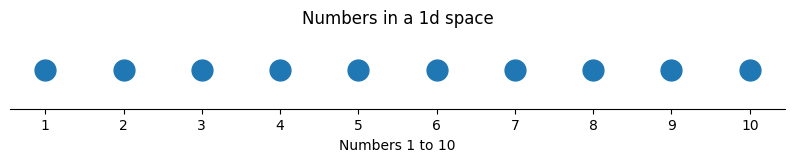

In [34]:
# Reference:
#   https://stackoverflow.com/questions/7352220/how-to-plot-1-d-data-at-given-y-value-with-pylab
#   https://stackabuse.com/matplotlib-turn-off-axis-spines-ticklabels-axislabels-grid/

# Let's say we plot these numbers on one dimension 
fig = plt.figure(figsize=(10, 1))
ax = fig.add_subplot()
ax.set_title('Numbers in a 1d space')
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.plot(x, np.zeros(len(x)), linestyle='', marker='o', markersize=15)
ax.set_xlabel('Numbers 1 to 10')
ax.set_xticks([1,2,3,4,5,6,7,8,9,10], [1,2,3,4,5,6,7,8,9,10])
ax.set_yticks([])
plt.show()

In [35]:
# Let's say we wanted to now transfer these numbers to a 2d space
# As in find the 2nd degree polynominal of these numbers
# We can take every number and find the square, as in 
[ i**2 for i in x ]

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

In [36]:
# We can then take these 2nd degree polynomial and make them our y axis
y_2nd_degree_polynominal = [ i**2 for i in x ]
y_2nd_degree_polynominal

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

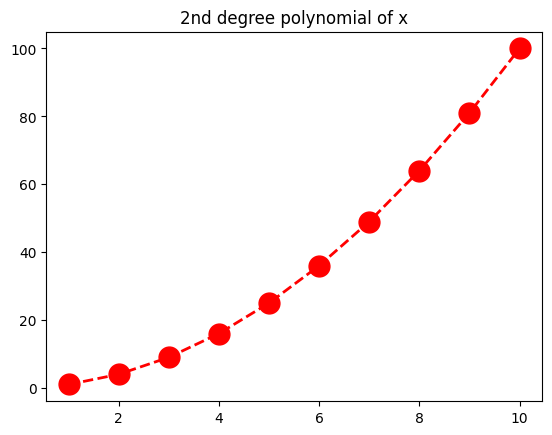

In [38]:
# If we plot x and y
# Rather than a straight line, we now have a curved line
plt.title('2nd degree polynomial of x')
plt.plot(x, y_2nd_degree_polynominal, ls='--', lw=2, c='r', marker='o', markersize=15)

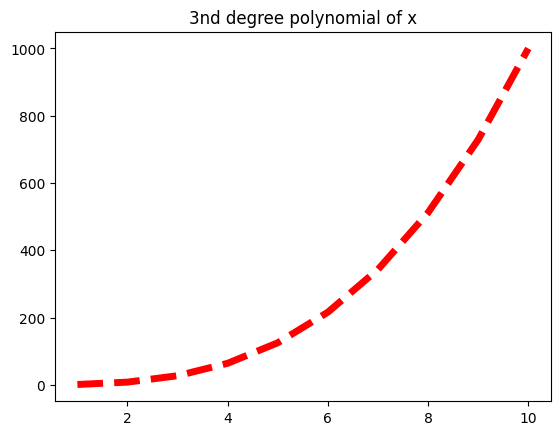

In [39]:
# We can even push this concept to a 3rd degree polynomial 
# We can see below, the curve is a bit more ... well curved :-)
plt.title('3nd degree polynomial of x')
plt.plot(x, [i**3 for i in x], ls='--', lw=5, c='r')

In [40]:
# The above concepts, can be used to fit a curved line that best suits our data.
# Before going back to our data, let's see wha The Polynomial features class from sklearn does

In [41]:
# Import the polynominal features class
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
from sklearn.preprocessing import PolynomialFeatures

In [42]:
# Reusing our array from the Logistic Regression notebook
#   10. Beginning Supervise Learning - Machine Learning - Logistic Regression, Decision Trees and Metrics
x = np.array([[2], [3]], ndmin=2, dtype=float)
y = np.array([0, 1])

In [43]:
# Stack the two items together to get a view of what the dataset looks like
np.hstack((x, y.reshape(-1, 1)))

array([[2., 0.],
       [3., 1.]])

In [44]:
# When we find a 2nd degree polynomial, we see it is our original value (middle column) squared (right most column)
# Just as we did above
# The ones at the left, represent the bias/intercept. 
# Notice I did included_bias=True
poly = PolynomialFeatures(degree=2, include_bias=True).fit_transform(x)
poly

array([[1., 2., 4.],
       [1., 3., 9.]])

In [45]:
# If include_bias=False, the intercept/bias is not there 
# This time, its a 3rd degree Polynominal
# original value in the left most column, the 2nd degree in the middle column and the 3rd degree in the final column
poly = PolynomialFeatures(degree=3, include_bias=False).fit_transform(x)
poly

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.]])

In [46]:
# If we look at a 4th degree polynomial 
# We see the final column represents the original feature to the 4th power
# The original feature is in the 2nd column. 
poly = PolynomialFeatures(degree=4, include_bias=True).fit_transform(x)
poly

array([[ 1.,  2.,  4.,  8., 16.],
       [ 1.,  3.,  9., 27., 81.]])

In [47]:
# Let's move on
# Import the Polynomial Features from sklearn
# from sklearn.preprocessing import PolynomialFeatures

In [48]:
# Create the new polynomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# Fit on the originator packets data
orig_pkts_poly = poly_features.fit_transform(df_conn['orig_pkts'].values.reshape(-1, 1))
orig_pkts_poly

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [49]:
# Leverage regression for this model
# Fit on the polynomial data
lr = LinearRegression(fit_intercept=True)
lr.fit(X=orig_pkts_poly, y=df_conn['resp_pkts'].values.reshape(-1,1))

LinearRegression()

In [50]:
# At this point, we can make a prediction on our polynomial features
lr.predict(orig_pkts_poly)

array([[0.15900679],
       [0.15900679],
       [0.15900679],
       ...,
       [0.15900679],
       [0.15900679],
       [0.15900679]])

In [51]:
# Doing this a different way, using np.polyfit and np.poly1d
# Rather than using our previous x and y, let's add a few more numbers
x = np.array([1,2,3,4,5,6,7,8, 9,10])
y = np.array([1,2,3,4,5,4,3,2,1,0])
x, y

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([1, 2, 3, 4, 5, 4, 3, 2, 1, 0]))

In [52]:
# Now let's use np.polyfit to get a second degree polynomial
# For this, our first degree polynomial or straight line is y = ax+b
# Our second degree polynomial is y = ax**2 + bx + c
# If we wanted a third degree polynomial, we would get y = ax**3 + bx**2 + cx + d
# For now, let's keep it at 2 degrees
second_degree_poly = np.polyfit(x=x, y=y, deg=2)

# Let's now grab the coefficients
# This represents our a in ax**2 our b in bx and our c
second_degree_poly

array([-0.18939394,  1.93181818, -0.83333333])

In [53]:
# Taking a better view of this output, we now use np.poly1d
polynomial = np.poly1d(second_degree_poly)

# We see below the numbers represent what we have above.
polynomial

poly1d([-0.18939394,  1.93181818, -0.83333333])

In [54]:
# Giving it more context from the perspective of our formula
# We see the ax**2 + bx + c
print(polynomial)

         2
-0.1894 x + 1.932 x - 0.8333


In [56]:
# Let's say, x was 1, then this 3rd polynomial, works out to ...
# Rounding up 3 decimals
np.round(( -0.1894  * (1**2) ) + (1.932 * 1 ) - 0.8333, 3)

0.909

In [57]:
# We can confirm above by taking advantage of np.poly1d
np.round(polynomial(1), 3)

0.909

In [58]:
# With that understanding, 
# Let's create a few polyfits for our original data, to see which one works best with our dataset
# First, a 1 degree polynomial - basically a straight line
poly_1 = np.poly1d(np.polyfit(x=df_conn.orig_pkts.values, y=df_conn.resp_pkts.values, deg=1))

# Next, a second degree polynomial
poly_2 = np.poly1d(np.polyfit(x=df_conn.orig_pkts.values, y=df_conn.resp_pkts.values, deg=2))

# A third degree polynomial
poly_3 = np.poly1d(np.polyfit(x=df_conn.orig_pkts.values, y=df_conn.resp_pkts.values, deg=3))

# A fourth degree polynomial
poly_4 = np.poly1d(np.polyfit(x=df_conn.orig_pkts.values, y=df_conn.resp_pkts.values, deg=4))

# A 10 degree polynomial
poly_5 = np.poly1d(np.polyfit(x=df_conn.orig_pkts.values, y=df_conn.resp_pkts.values, deg=5))

In [59]:
# print the highest degree polynomial
# From above, this is our 5 degree polynomial 
print(poly_5)

            5             4             3             2
-6.321e-22 x + 6.113e-16 x - 2.083e-10 x + 2.833e-05 x + 0.942 x + 0.4203


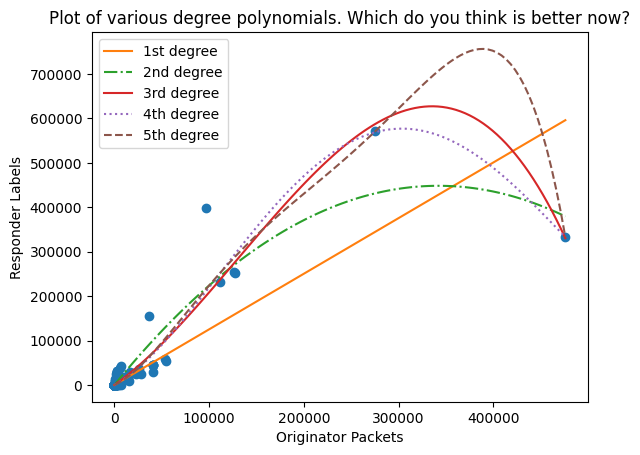

In [60]:
# Setup the line
xp = np.linspace(start=np.min(df_conn.orig_pkts.values), stop=np.max(df_conn.orig_pkts.values), num=100)
plt.title('Plot of various degree polynomials. Which do you think is better now?')
#_ = plt.plot(df_conn.orig_pkts.values, df_conn.resp_pkts.values, 'o', xp, poly_1(xp), '-', xp, poly_2(xp), '--', xp, poly_3(xp), '--', xp, poly_4(xp), '-')
plt.plot(df_conn.orig_pkts.values, df_conn.resp_pkts.values, 'o')
plt.plot(xp, poly_1(xp), linestyle='-', label='1st degree')
plt.plot(xp, poly_2(xp), linestyle='dashdot', label='2nd degree') 
plt.plot(xp, poly_3(xp), linestyle='solid', label='3rd degree')
plt.plot(xp, poly_4(xp), linestyle='dotted', label='4th degree')
plt.plot(xp, poly_5(xp), linestyle='dashed', label='5th degree')
plt.xlabel('Originator Packets')
plt.ylabel('Responder Labels')
plt.legend(loc='best')

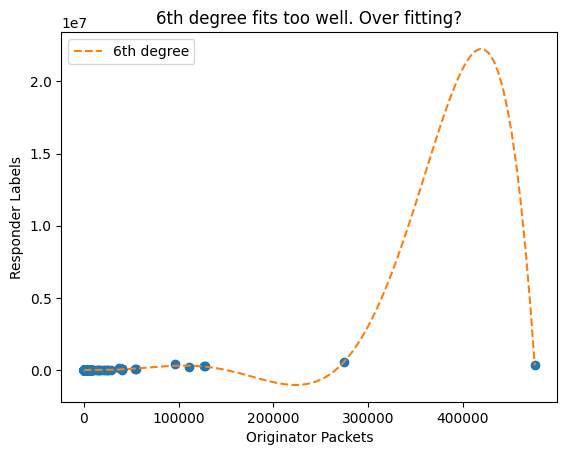

In [61]:
# From above, we can see that except for the straight line
# Everything else seems to be a relative ok fit. 
# Have any of these fitted too well?!
# We see there are some points with no lines touching them
# What would happen if we do a 6th degree fit?

poly_6 = np.poly1d(np.polyfit(x=df_conn.orig_pkts.values, y=df_conn.resp_pkts.values, deg=6))

# Setup the line
xp = np.linspace(start=np.min(df_conn.orig_pkts.values), stop=np.max(df_conn.orig_pkts.values), num=100)
plt.title('6th degree fits too well. Over fitting?')
plt.plot(df_conn.orig_pkts.values, df_conn.resp_pkts.values, 'o')
plt.plot(xp, poly_6(xp), linestyle='dashed', label='6th degree')
plt.xlabel('Originator Packets')
plt.ylabel('Responder Labels')
plt.legend(loc='best')

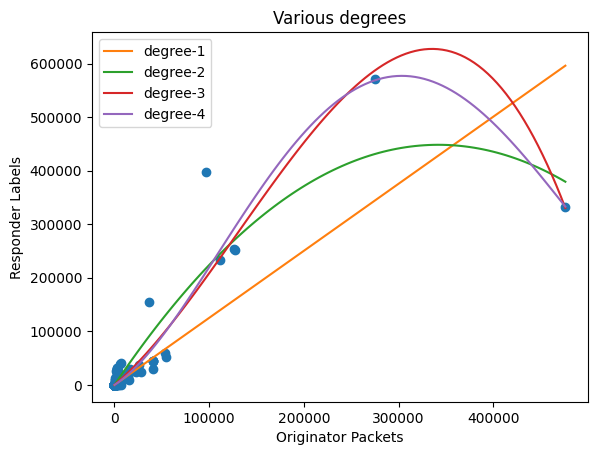

In [62]:
# Over fitting is the biggest concern with the 6th degree polynomial. 
# This is also true with some of the other polynomials
# We see the 6th degree touches every point
# # However, this is not really what you want 
# It is about finding the right balance

# Above, all of the degrees and the plotting were done manually
# Could we make this process simpler? Sure!

# First up, get the line again
xp = np.linspace(start=np.min(df_conn.orig_pkts.values), stop=np.max(df_conn.orig_pkts.values), num=100)

# Setup the static parts of the plot
plt.title('Various degrees')
plt.plot(df_conn.orig_pkts.values, df_conn.resp_pkts.values, 'o')

for degree in range(1,5,1):
    poly = np.poly1d(np.polyfit(x=df_conn.orig_pkts.values, y=df_conn.resp_pkts.values, deg=degree))
    plt.plot(xp, poly(xp), label=f'degree-{degree}')
plt.xlabel('Originator Packets')
plt.ylabel('Responder Labels')
plt.legend(loc='best')

In [ ]:
# Previously I asked which degree would you choose. For me, I would stick at 2
# Your thoughts?

In [63]:
# Let's say from our dataset, we decided that a 4th degree polynomial fits our purpose best
# We can then setup a pipeline for this
# Import the class
from sklearn.pipeline import Pipeline

In [64]:
# Setup the pipeline
# Reference:
#   https://stackoverflow.com/questions/59725907/scikit-learn-polynomialfeatures-what-is-the-use-of-the-include-bias-option
pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=4, include_bias=False)),
    ('lr', LinearRegression(fit_intercept=True)),
])
pipe.fit(X=df_conn.orig_pkts.values.reshape(-1,1), y=df_conn.resp_pkts.values.reshape(-1,1))

Pipeline(steps=[('poly', PolynomialFeatures(degree=4, include_bias=False)),
                ('lr', LinearRegression())])

In [65]:
# Make a prediction with our pipelines
predictions = pipe.predict(df_conn.orig_pkts.values.reshape(-1,1))
predictions

array([[2.46799158],
       [2.46799158],
       [2.46799158],
       ...,
       [2.46799158],
       [2.46799158],
       [2.46799158]])

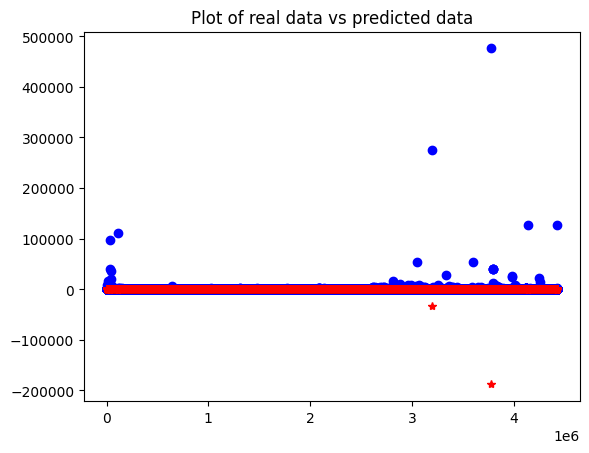

In [66]:
# Get a plot of the real data vs the prediction
# One thing we can see from below is negative values. 
# We know the network cannot have negative bytes
# Hence the comment about overfitting earlier
plt.title('Plot of real data vs predicted data')
plt.plot(df_conn.orig_pkts, linestyle='', marker='o', c='b')
plt.plot(pipe.predict(df_conn.orig_pkts.values.reshape(-1,1)), linestyle='', marker='*', c='r')

In [67]:
# Finding those records where prediction is less than 0
# Once again, we don't expect negative values for the resp packets
predictions[np.where(predictions < 0)]

array([   -661.27966707,   -1232.55833979,  -32297.1843115 ,
       -187806.07420754,   -2166.00222062,   -2099.37943593])

In [ ]:
# Earlier Above, we dealt with data which had positive correlation and was able to use some type of straight line
# We had a straight line and we had curved lines of various degrees
# What about if there is no linear relationship with the data, you can use an SVM model instead
# Obviously, this data has a linear relationship, so the RBF model is probably not the best fit for this 
# We discussed the SVM and RBF in notebook:
#   10 - Beginning Supervise Learning - Machine Learning - Logistic Regression, Decision Trees and Metrics <br>
# However, remember, this is for demo purposes
# Using the kernel function, we can transform the data to a higher dimensional feature 
# space to be able to perform the linear separation

In [68]:
# SVM is used for classification but can also be used for regression and outlier detection
# SVM can handle both linear and non linear data
# The same concepts used in SVM classification are used in SVM Regressor
# SVM supports both linear and non-linear regression
# The major difference is the epsilon which is the margin of tolerance is set in approximation to the SVM
# for our example, we want to fit as many points between the the hyperplane and the margins 
# How well we limit the points will be determined by our epsilon
# Our objective is to ensure our errors do not exceed our threshold , i.e. the epsilon 
# The system will not accept deviations larger than epsilon ``````````
# Just like SVM classification, we want to minimize the error by maximizing the margin
# We looked at SVM in 
#   10. Beginning Supervise Learning - Machine Learning - Logistic Regression, Decision Trees and Metrics

# Import the SVM Regressor 
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
from sklearn.svm import SVR

In [69]:
# Fit to our dataset
# Let's use the RBF Kernel
reg_svr = SVR(kernel='rbf', epsilon=.1)
reg_svr

SVR()

In [70]:
# Fit to the data
# Tying to fit the entire dataset, at one time took over an hour.
# As a result, I took a subset of the data, as this is for learning purposes
reg_svr.fit(X=df_conn.orig_pkts.values.reshape(-1, 1)[:1000], y=df_conn.resp_pkts.values[:1000])

SVR()

In [71]:
# With the model fitted, let's make some predictions
predictions = reg_svr.predict(df_conn.orig_pkts.values.reshape(-1, 1)[:1000])
predictions

array([ 0.33581086,  0.33581086,  0.33581086,  0.33581086,  0.33581086,
        4.06670248, 85.39476215,  4.06670248, 78.12207461, 76.0787562 ,
        0.89999728,  0.33581086,  0.33581086,  0.33581086,  0.33581086,
        4.06670248,  0.89999728,  0.89999728,  0.89999728,  0.33581086,
        4.06670248, 81.17545028,  4.06670248, 74.36839431,  0.33581086,
        0.33581086,  3.39006276, 83.96042663,  0.89999728,  0.89999728,
        0.89999728,  0.89999728,  0.89999728,  2.09999991,  0.89999728,
        0.89999728,  0.89999728,  0.89999728,  0.33581086,  0.89999728,
        0.89999728,  0.89999728,  0.89999728,  4.06670248,  0.89999728,
        0.89999728,  0.89999728, 79.27901234,  0.89999728,  0.89999728,
        0.89999728,  0.89999728,  0.89999728,  0.33581086,  0.33581086,
        4.06670248, 84.77764298,  0.33581086,  0.89999728,  4.06670248,
        0.89999728, 80.72030284,  0.89999728,  0.89999728, 84.75796313,
        0.89999728,  0.33581086,  0.33581086,  4.06670248, 58.52

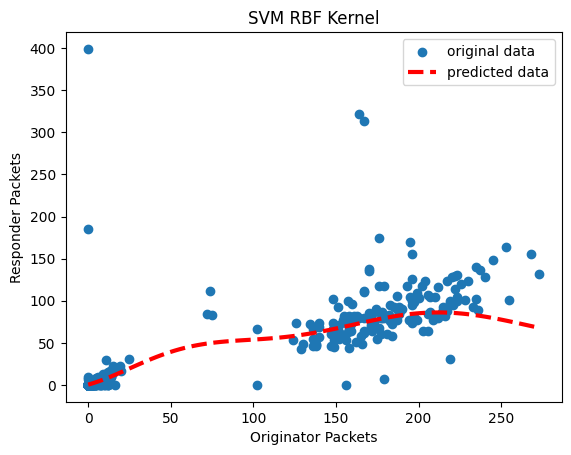

In [72]:
# What does our model look like
plt.title('SVM RBF Kernel')
xp = np.linspace(start=np.min(df_conn.orig_pkts.values[:1000]), \
                 stop=np.max(df_conn.orig_pkts.values[:1000]), num=100).reshape(-1, 1)
plt.scatter(x=df_conn.orig_pkts.values[:1000] , y=df_conn.resp_pkts.values[:1000], label='original data')
plt.plot(xp, reg_svr.predict(xp), color='red', linestyle='--', linewidth=3, label='predicted data')
plt.xlabel('Originator Packets')
plt.ylabel('Responder Packets')
plt.legend(loc='best')

In [73]:
# Get the R**2 value for the model
# Not a bad value.
my_rsquared(y_true=df_conn.resp_pkts.values[:1000], y_pred=predictions)

0.720717912761971

In [74]:
# Prepare to save the model to disk
import os
from joblib import dump, load

In [75]:
# Create the location to save the model
PATH = './SAVED_MODELS/SVR/'
MODELS_PATH = os.makedirs(name=PATH, exist_ok=True)

# Saving the model to disk
dump(value=reg_svr, filename=f'{PATH}/model_reg_svr.joblib')

['./SAVED_MODELS/SVR//model_reg_svr.joblib']

In [78]:
# Load the model
loaded_reg_svr_model = load(filename='./SAVED_MODELS/SVR/model_reg_svr.joblib')
loaded_reg_svr_model

SVR()

In [79]:
np.array(10, ndmin=2)

array([[10]])

In [80]:
# Make a prediction on a random sample
loaded_reg_svr_model.predict(np.array(1500, ndmin=2))

array([47.52635422])

In [81]:
# Good stuff. Time to close out this notebook

In [ ]:
'''
Additional References and good reads/videos:
https://towardsdatascience.com/multiple-linear-regression-python-101-af459110a8af
https://www.merkle.com/in/blog/marketing-data-science-101-linear-regression
https://medium.com/ml-concepts/linear-regression-101-f4c27fb7a586
https://medium.com/@ugursavci/machine-learning-101-linear-regression-949b7faaebe0
https://dziganto.github.io/data%20science/linear%20regression/machine%20learning/python/Linear-Regression-101-Assumptions-and-Evaluation/
https://medium.datadriveninvestor.com/machine-learning-101-part-1-24835333d38a

https://data36.com/polynomial-regression-python-scikit-learn/
https://stackabuse.com/matplotlib-turn-off-axis-spines-ticklabels-axislabels-grid/
https://en.wikipedia.org/wiki/Curve_fitting
https://www.youtube.com/watch?v=Dggl0fJJ81k
https://www.youtube.com/watch?v=Ck6G_qUFJGM
https://www.youtube.com/watch?v=H8kocPOT5v0
https://www.mathworks.com/help/matlab/ref/polyfit.html
https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.polyfit.html
https://eitanlees.github.io/numpy-poly-fit/
https://towardsdatascience.com/deep-understanding-of-simple-linear-regression-3776afe34473

 '''